#Simple moving average crossover to get buy and sell signal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# load the data
df=pd.read_csv('/content/drive/MyDrive/machine learning/dataset/b_dataset.csv')
# set the date as index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2000-06-05,2000-06-05,38.520000,39.080002,38.419998,38.840000,38.840000,450000
2000-06-06,2000-06-06,39.099998,39.099998,38.580002,38.759998,38.759998,230000
2000-06-07,2000-06-07,39.000000,39.299999,38.820000,39.279999,39.279999,325000
2000-06-08,2000-06-08,39.340000,39.340000,39.080002,39.119999,39.119999,255000
2000-06-09,2000-06-09,39.119999,39.500000,38.680000,39.000000,39.000000,290000
...,...,...,...,...,...,...,...
2023-05-26,2023-05-26,320.440002,322.630005,319.670013,320.600006,320.600006,3229400
2023-05-30,2023-05-30,321.859985,322.470001,319.000000,322.190002,322.190002,3231800
2023-05-31,2023-05-31,321.119995,322.410004,319.390015,321.079987,321.079987,6175000
2023-06-01,2023-06-01,321.420013,323.220001,319.529999,323.119995,323.119995,3375300


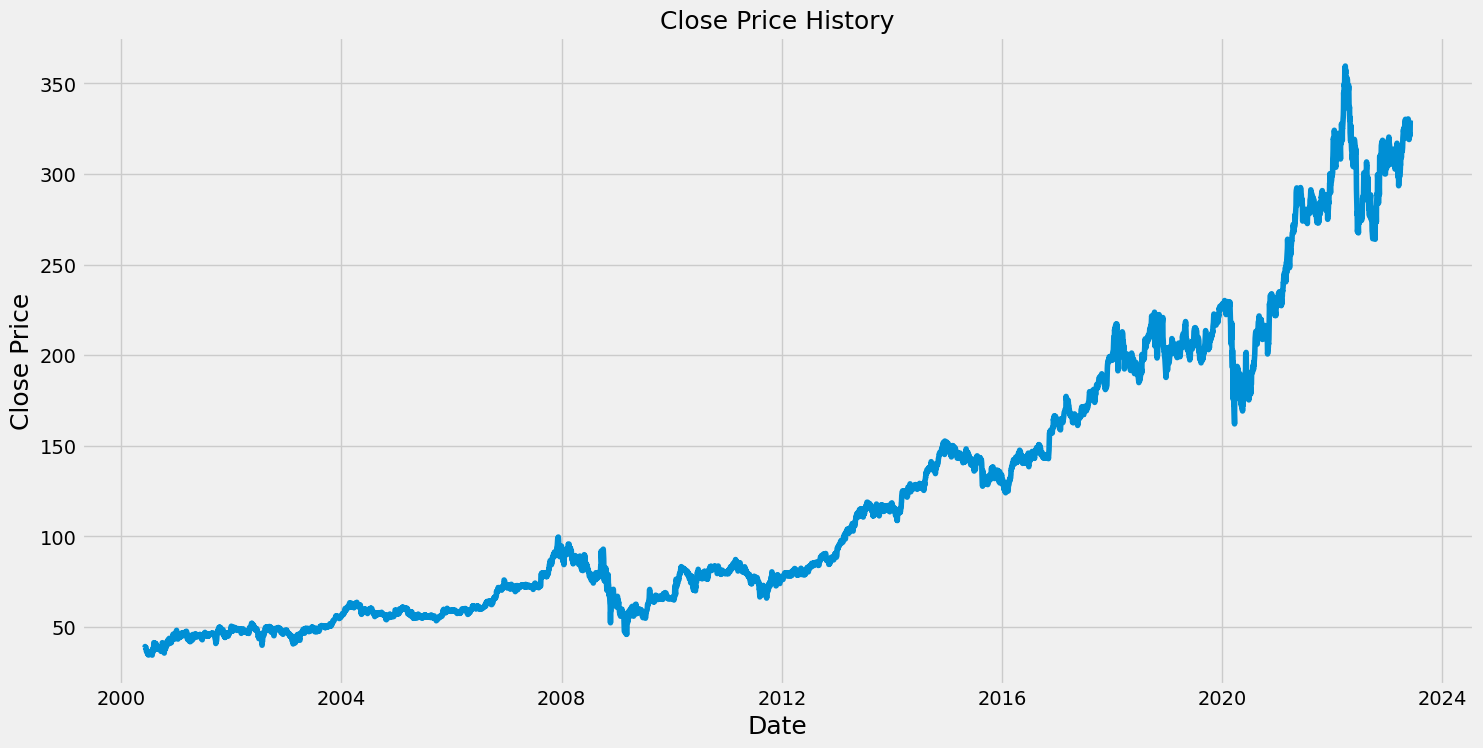

In [7]:
#cvisulaly show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' , fontsize=18)
plt.show()

In [8]:
#create a function to calculate the simple moving avg(SMA)
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

In [19]:
#create two new columns to store the 20 day and 50 day SMA
df['SMA20']=SMA(df, 700)
df['SMA50']=SMA(df, 210)

In [22]:
#get the buy and sell signals
df['Signal'] = np.where(df['SMA20'] < df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'], np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

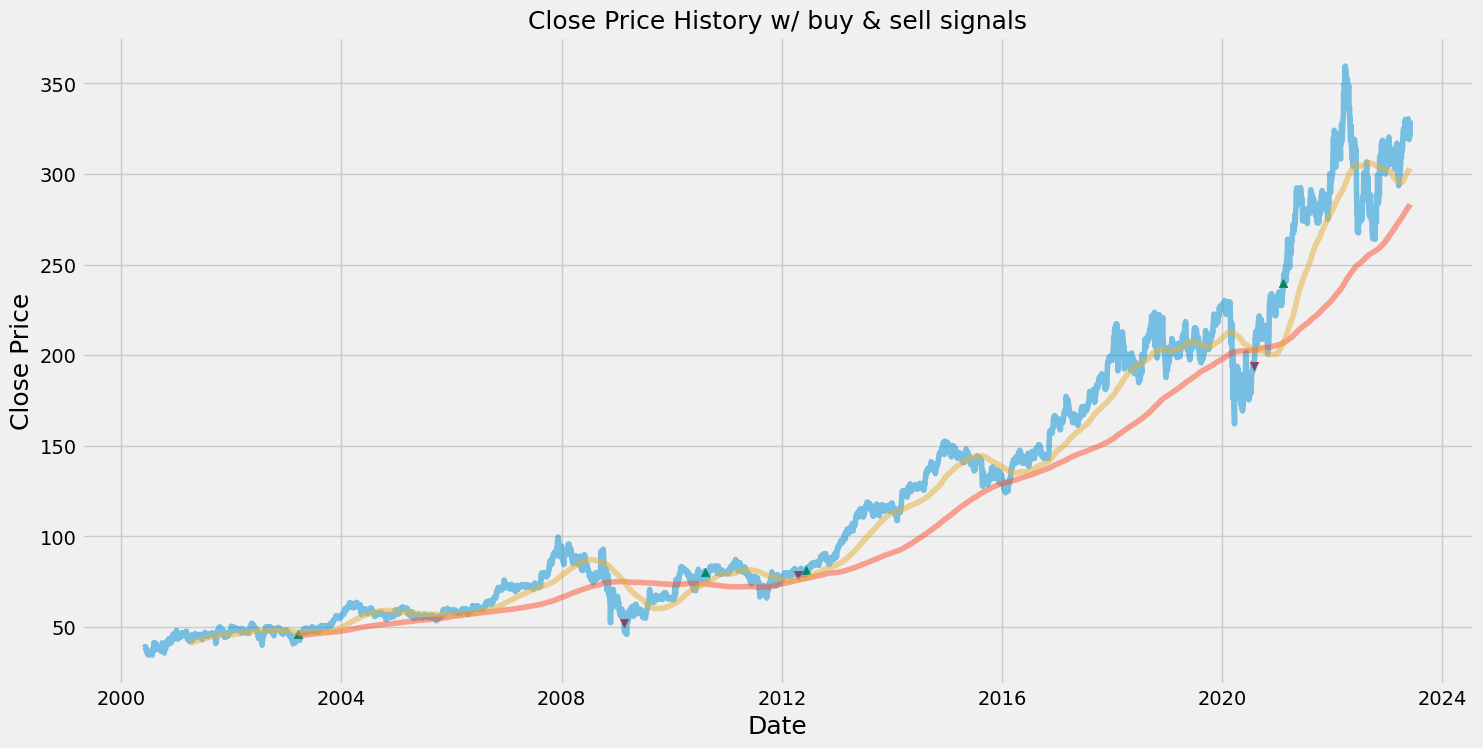

In [23]:
#visually show the close pice with the SMA and buy & sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ buy & sell signals', fontsize=18)
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA20'], alpha=0.5, label='SMA20')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')
plt.scatter(df.index, df['Buy'], alpha=1,label='buy signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1,label='sell signal', marker='v', color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' , fontsize=18)
plt.show()